# Dev Notes

- Use the second CSV that includes all of the provincial economic stats
- Use these notebooks:
-- https://www.kaggle.com/code/craigchilvers/opioids-in-the-us-initial-data-cleaning
-- https://www.kaggle.com/code/craigchilvers/opioids-in-the-us-initial-graphs
-- https://www.kaggle.com/code/craigchilvers/us-drug-overdose-eda-and-visualisation/notebook#Exploratory-Data-Analysis
- Left off in the first notebook at the date formatting part.

# Introduction

- Data is included for stimulants and opioids. This analysis is solely focused on opioids.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Setup

In [2]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
# save filepath to variable for easier access
# drug_overdose_filepath = '../input/opioids-in-canada/Canada opioid and stimulant Subtance Harms Data June 2022.csv'

overdose_filepath = '/home/bennett/git/Opioids-in-Canada-EDA/input/opioids-in-canada/Canada opioid and stimulant Subtance Harms Data June 2022.csv'
canstats_filepath = '/home/bennett/git/Opioids-in-Canada-EDA/input/opioids-in-canada/Canada population and GDP by province.csv' 

# read data and store in dataframe
# add encoding to prevent a 'UnicodeDecodeError'
df = pd.read_csv(overdose_filepath, encoding = "ISO-8859-1")
canstats = pd.read_csv(canstats_filepath, encoding = "ISO-8859-1")

## Data Cleaning

In [5]:
# let's take a look at the data
df.head()

,Substance,Source,Specific_Measure,Type_Event,Region,PRUID,Time_Period,Year_Quarter,Aggregator,Disaggregator,Unit,Value
0,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2016,NaN,NaN,Crude rate,7.8
1,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2016,NaN,NaN,Number,2829
2,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2016,NaN,NaN,Age-adjusted rate,7.8
3,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2017,NaN,NaN,Crude rate,10.7
4,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2017,NaN,NaN,Number,3921


In [6]:
df.tail()

,Substance,Source,Specific_Measure,Type_Event,Region,PRUID,Time_Period,Year_Quarter,Aggregator,Disaggregator,Unit,Value
12154,Stimulants,Hospitalizations,Age group by sex,Intentional stimulant-related poisoning hospit...,Canada,1,By year,2016,40 to 49 years,Male,Number,41
12155,Stimulants,Hospitalizations,Age group by sex,Intentional stimulant-related poisoning hospit...,Canada,1,By year,2016,50 to 59 years,Female,Number,31
12156,Stimulants,Hospitalizations,Age group by sex,Intentional stimulant-related poisoning hospit...,Canada,1,By year,2016,50 to 59 years,Male,Number,29
12157,Stimulants,Hospitalizations,Age group by sex,Intentional stimulant-related poisoning hospit...,Canada,1,By year,2016,60 years or more,Female,Number,8
12158,Stimulants,Hospitalizations,Age group by sex,Intentional stimulant-related poisoning hospit...,Canada,1,By year,2016,60 years or more,Male,Number,8


In [7]:
# here are some provincial and federal figures that we will work with later
canstats.head()

,Province name,Population (2021 Census),Land area (km^2),Population per km^2,"GDP (million CAD, 2019)","GDP per capita (CAD, 2019)","Market income per capita (CAD, 2019)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ontario,"14,223,942","908,699.33",15.653079,"891,811","54,149","36,298"
2,Quebec,"8,501,833","1,356,625.27",6.266899,"460,357","54,149","32,351"
3,British Columbia,"5,000,879","922,503.01",5.420989,"309,059","60,707","36,723"
4,Alberta,"4,262,635","640,330.46",6.656930,"352,884","80,905","40,094"


In [8]:
canstats.tail()

,Province name,Population (2021 Census),Land area (km^2),Population per km^2,"GDP (million CAD, 2019)","GDP per capita (CAD, 2019)","Market income per capita (CAD, 2019)"
9,Newfoundland and Labrador,"510,550","370,514.08",1.377950,"35,349","71,527","30,977"
10,Prince Edward Island,"154,331","5,686.03",27.142136,"7,523","48,039","28,414"
11,Northwest Territories,"41,070","1,143,793.86",0.035907,"4,542","100,871","43,125"
12,Yukon,"40,232","474,712.68",0.084750,"3,157","76,114","42,715"
13,Nunavut,"36,858","1,877,778.53",0.019629,"3,689","95,535","27,251"


In [9]:
# let's check the data types of each column
# the PRUID is Stats Canada's numerical classifier for a province or territory name, where Canada has a PRUID of 1
df.dtypes

Substance           object
Source              object
Specific_Measure    object
Type_Event          object
Region              object
PRUID                int64
Time_Period         object
Year_Quarter        object
Aggregator          object
Disaggregator       object
Unit                object
Value               object
dtype: object

In [10]:
# our data has 12 classes and 12158 rows
df.shape

(12159, 12)

## Region

In [11]:
# checking the regions that are listed, we can see some duplication
df.Region.value_counts()

Canada                               1768
Saskatchewan                         1069
Ontario                              1069
Nova Scotia                          1063
British Columbia                     1015
Alberta                               845
New Brunswick                         841
Manitoba                              807
Quebec                                710
Newfoundland and Labrador             702
Prince Edward Island                  532
Northwest Territories                 372
Territories                           268
Nunavut                               256
Yukon                                 241
Winnipeg Manitoba                     165
Yellowknife Northwest Territories     165
Northern and Rural Manitoba           162
Whitehorse Yukon                      109
Name: Region, dtype: int64

In [12]:
# we will remove 'Territories', 'Winnipeg Manitoba', 'Yellowknife Northwest Territories', 'Northern and Rural Manitoba', and 'Whitehorse Yukon'
removals = ['Territories', 'Winnipeg Manitoba',
            'Yellowknife Northwest Territories',
            'Northern and Rural Manitoba',
           'Whitehorse Yukon']

for i in removals:
    df = df[df.Region != i]
    
df.Region.value_counts()

Canada                       1768
Saskatchewan                 1069
Ontario                      1069
Nova Scotia                  1063
British Columbia             1015
Alberta                       845
New Brunswick                 841
Manitoba                      807
Quebec                        710
Newfoundland and Labrador     702
Prince Edward Island          532
Northwest Territories         372
Nunavut                       256
Yukon                         241
Name: Region, dtype: int64

## Dates

In [13]:
# let's check how the dates are organized
df.Year_Quarter.value_counts()

2021                 2062
2020                 2038
2019                 1779
2018                 1649
2017                  780
2016                  734
2020 Q3               104
2020 Q1               104
2020 Q2               104
2020 Q4               104
2021 Q1               104
2019 Q4               102
2019 Q3               102
2019 Q2               102
2021 Q2               102
2019 Q1               102
2018 Q4               100
2018 Q2               100
2018 Q3               100
2021 Q3                99
2021 Q4                99
2018 Q1                92
2017 Q4                82
2017 Q3                82
2017 Q2                82
2017 Q1                81
2016 Q4                72
2016 Q3                72
2016 Q2                72
2016 Q1                72
2018 (Apr to Dec)      13
Name: Year_Quarter, dtype: int64

In [14]:
# since we have a measure for '2018 Q1', we'll remove '2018 (Apr to Dec)'
df = df[df.Year_Quarter != '2018 (Apr to Dec)']
    
df.Year_Quarter.value_counts()

2021       2062
2020       2038
2019       1779
2018       1649
2017        780
2016        734
2020 Q3     104
2020 Q1     104
2020 Q2     104
2020 Q4     104
2021 Q1     104
2019 Q4     102
2019 Q3     102
2019 Q2     102
2021 Q2     102
2019 Q1     102
2018 Q4     100
2018 Q2     100
2018 Q3     100
2021 Q3      99
2021 Q4      99
2018 Q1      92
2017 Q4      82
2017 Q3      82
2017 Q2      82
2017 Q1      81
2016 Q4      72
2016 Q3      72
2016 Q2      72
2016 Q1      72
Name: Year_Quarter, dtype: int64

## Substance

In [15]:
# we can see that the overdoses are arranged by stimulants and opioids, with more reported data for opioids
df.Substance.value_counts()

Opioids       7580
Stimulants    3697
Name: Substance, dtype: int64

In [16]:
df.dtypes

Substance           object
Source              object
Specific_Measure    object
Type_Event          object
Region              object
PRUID                int64
Time_Period         object
Year_Quarter        object
Aggregator          object
Disaggregator       object
Unit                object
Value               object
dtype: object

In [17]:
Canada_deaths_data = df[df.Substance == 'Opioids']
Canada_deaths_data = df[df.Source == 'Deaths']
Canada_deaths_data = df[df.Region == 'Canada']
Canada_deaths_data = df[df.Time_Period == "By year"]
Canada_deaths_data = df[df.Unit == "Number"]

Canada_deaths_data.head()

,Substance,Source,Specific_Measure,Type_Event,Region,PRUID,Time_Period,Year_Quarter,Aggregator,Disaggregator,Unit,Value
1,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2016,NaN,NaN,Number,2829
4,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2017,NaN,NaN,Number,3921
7,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2018,NaN,NaN,Number,4406
10,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2019,NaN,NaN,Number,3698
13,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2020,NaN,NaN,Number,6638


In [18]:
# plt.figure(figsize=(20, 10))
# plt.title("Total Deaths from Opioids in Canada since 2016, by Year")
# sns.lineplot(Canada_deaths_data.head, x='Year', y='Opioid Deaths', label='Total Deaths from Opioids in Canada')
# plt.xlabel('Year_Quarter')

In [19]:
df.columns

Index(['Substance', 'Source', 'Specific_Measure', 'Type_Event', 'Region',
       'PRUID', 'Time_Period', 'Year_Quarter', 'Aggregator', 'Disaggregator',
       'Unit', 'Value'],
      dtype='object')

In [20]:
df.isnull().sum()

Substance              0
Source                 0
Specific_Measure       0
Type_Event             0
Region                 0
PRUID                  0
Time_Period            0
Year_Quarter           0
Aggregator          3752
Disaggregator       3752
Unit                   0
Value                534
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11277 entries, 0 to 12158
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Substance         11277 non-null  object
 1   Source            11277 non-null  object
 2   Specific_Measure  11277 non-null  object
 3   Type_Event        11277 non-null  object
 4   Region            11277 non-null  object
 5   PRUID             11277 non-null  int64 
 6   Time_Period       11277 non-null  object
 7   Year_Quarter      11277 non-null  object
 8   Aggregator        7525 non-null   object
 9   Disaggregator     7525 non-null   object
 10  Unit              11277 non-null  object
 11  Value             10743 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.1+ MB


In [22]:
# this is incorrect, it is only describing the PRUID because it is int64, where all of the others are objects
df.describe()

,PRUID
count,11277.00000
mean,29.55662
std,21.20665
min,1.00000
25%,11.00000
50%,35.00000
75%,47.00000
max,62.00000


In [23]:
df.nunique()

Substance              2
Source                 3
Specific_Measure      18
Type_Event            12
Region                14
PRUID                 14
Time_Period            2
Year_Quarter          30
Aggregator            40
Disaggregator         26
Unit                   4
Value               1047
dtype: int64

In [24]:
df['PRUID'].unique()

array([ 1, 59, 48, 47, 46, 35, 24, 13, 12, 11, 10, 60, 61, 62])

In [25]:
df['Year_Quarter'].value_counts()

2021       2062
2020       2038
2019       1779
2018       1649
2017        780
2016        734
2020 Q3     104
2020 Q1     104
2020 Q2     104
2020 Q4     104
2021 Q1     104
2019 Q4     102
2019 Q3     102
2019 Q2     102
2021 Q2     102
2019 Q1     102
2018 Q4     100
2018 Q2     100
2018 Q3     100
2021 Q3      99
2021 Q4      99
2018 Q1      92
2017 Q4      82
2017 Q3      82
2017 Q2      82
2017 Q1      81
2016 Q4      72
2016 Q3      72
2016 Q2      72
2016 Q1      72
Name: Year_Quarter, dtype: int64

In [26]:
# plt.figure(figsize=(15,6))
# sns.lineplot(data=df[df['PRUID'] == '1'], x=)

SyntaxError: invalid syntax (699032443.py, line 2)

In [43]:
# national opioid deaths
nod = df[(df.Source == 'Deaths') & 
        (df.Substance == 'Opioids') &
        (df.Region == 'Canada') &
        (df.PRUID == 1) &
        (df.Type_Event == 'Total apparent opioid toxicity deaths') &
        (df.Unit == 'Number')]

# nod['Value'] = pd.to_numeric(df['Value'], downcast="float")
# # df["Discount"] = pd.to_numeric(df["Discount"], downcast="float")
# print(df.dtypes)
# nod.Value.value_counts()
nod.Value = pd.to_numeric(nod.Value)
print(nod.dtypes)

Substance           object
Source              object
Specific_Measure    object
Type_Event          object
Region              object
PRUID                int64
Time_Period         object
Year_Quarter        object
Aggregator          object
Disaggregator       object
Unit                object
Value                int64
dtype: object


/tmp/ipykernel_32020/4060678230.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nod.Value = pd.to_numeric(nod.Value)


In [44]:
# yearly national opioid deaths
ynod = nod[(nod.Time_Period == 'By year')]

# quarterly national opioid deaths
qnod = nod[(nod.Time_Period == 'By quarter')]

In [45]:
# ynod.head()
ynod.head()

,Substance,Source,Specific_Measure,Type_Event,Region,PRUID,Time_Period,Year_Quarter,Aggregator,Disaggregator,Unit,Value
1,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2016,NaN,NaN,Number,2829
4,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2017,NaN,NaN,Number,3921
7,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2018,NaN,NaN,Number,4406
10,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2019,NaN,NaN,Number,3698
13,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2020,NaN,NaN,Number,6638


In [46]:
ynod.tail()

,Substance,Source,Specific_Measure,Type_Event,Region,PRUID,Time_Period,Year_Quarter,Aggregator,Disaggregator,Unit,Value
4,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2017,NaN,NaN,Number,3921
7,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2018,NaN,NaN,Number,4406
10,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2019,NaN,NaN,Number,3698
13,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2020,NaN,NaN,Number,6638
16,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2021,NaN,NaN,Number,7560


In [47]:
ynod.Unit.value_counts()

Number    6
Name: Unit, dtype: int64

<AxesSubplot: title={'center': 'Total Deaths from Opioids in Canada by Year'}, xlabel='Year_Quarter', ylabel='Value'>

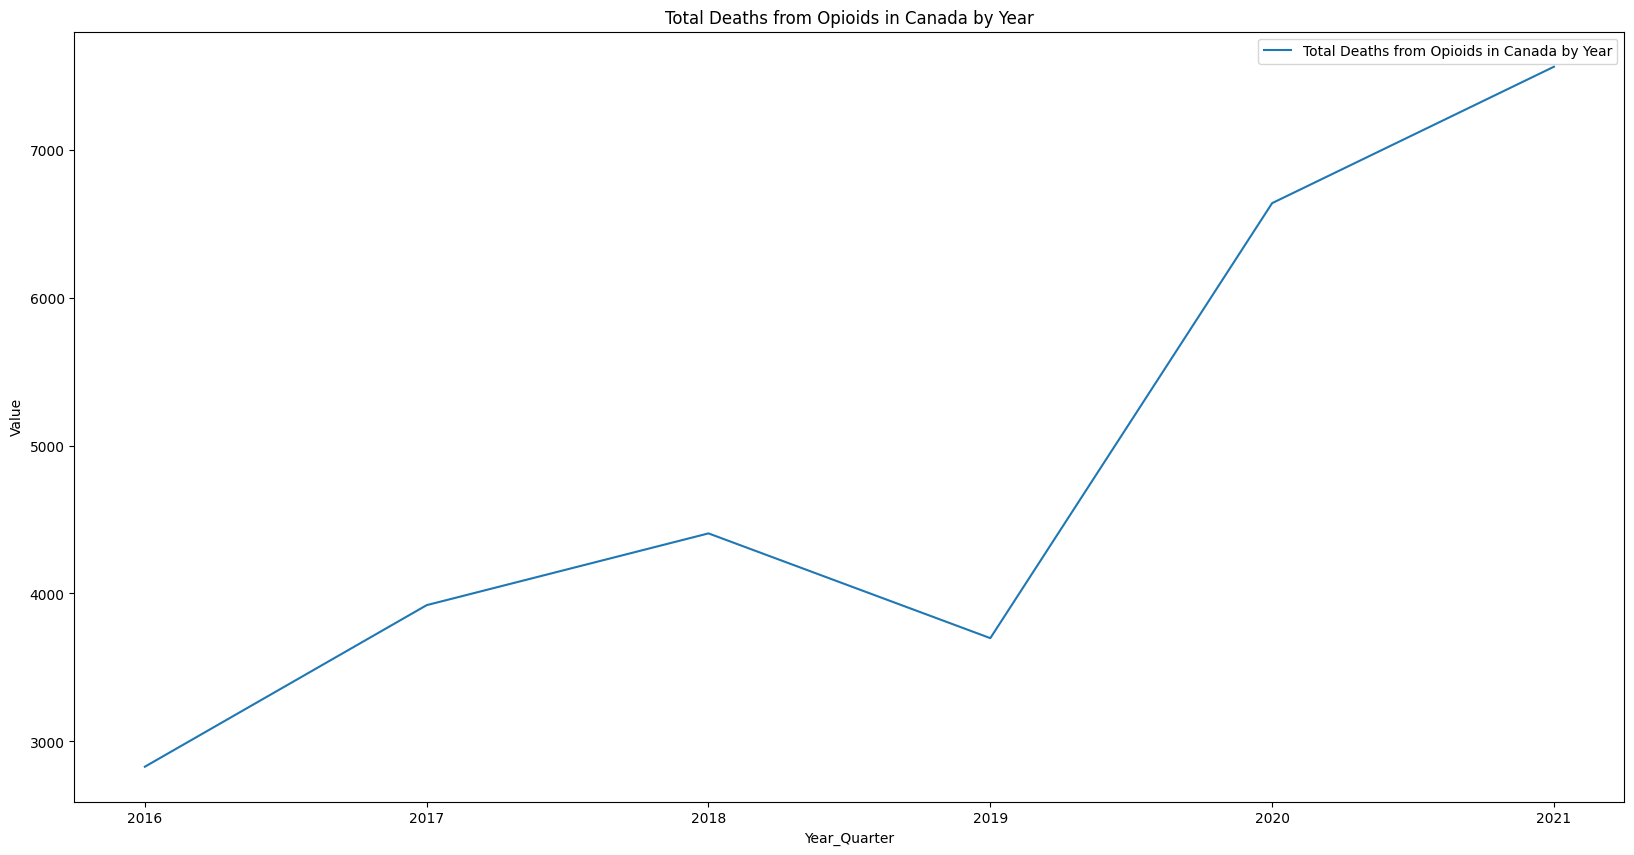

In [48]:
plt.figure(figsize=(20,10))
plt.title("Total Deaths from Opioids in Canada by Year")
sns.lineplot(data=ynod, x='Year_Quarter', y='Value', label="Total Deaths from Opioids in Canada by Year")

<AxesSubplot: title={'center': 'Total Deaths from Opioids in Canada by Quarter'}, xlabel='Year_Quarter', ylabel='Value'>

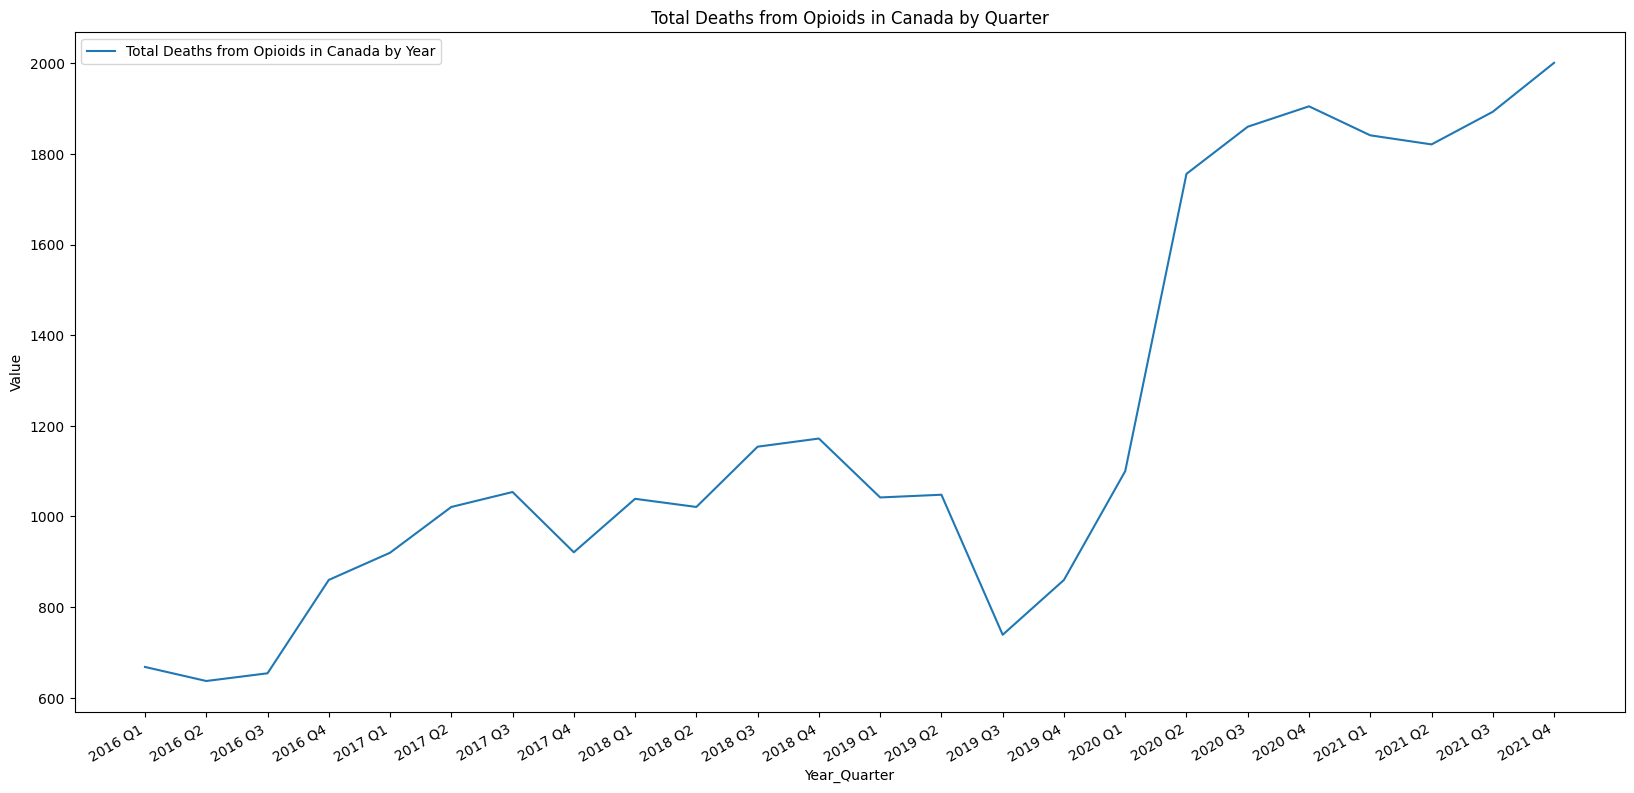

In [50]:
plt.figure(figsize=(20,10))
plt.title("Total Deaths from Opioids in Canada by Quarter")
plt.gcf().autofmt_xdate()
sns.lineplot(data=qnod, x='Year_Quarter', y='Value', label="Total Deaths from Opioids in Canada by Year")